In [1]:
import pandas as pd
import numpy as np
import groups_cols
from matplotlib import pyplot as plt
import seaborn as sns
tables = {}

# Mean and std tables

In [2]:
iqr = pd.read_csv('IQR.csv', sep=';')

In [3]:
iqr

,Unnamed: 0,ACP,pol,q3,q1,median,IQR,mean,std,count,optimal_count
0,0,all,POLICIES_buy,0.0,0.0,0.0,0.0,0.036194,0.186773,250592.0,9070.0
1,1,all,POLICIES_rent,1.0,0.0,0.0,1.0,0.310333,0.462630,250070.0,77605.0
2,2,all,POLICIES_wage,1.0,0.0,0.0,1.0,0.329212,0.469927,250015.0,82308.0
3,3,all,POLICIES_no_policy,0.0,0.0,0.0,0.0,0.178652,0.383060,249323.0,44542.0
4,4,PROCESSING_ACPS_BELO HORIZONTE,POLICIES_buy,0.0,0.0,0.0,0.0,0.094223,0.292138,5487.0,517.0
...,...,...,...,...,...,...,...,...,...,...,...
183,183,PROCESSING_ACPS_SANTOS,POLICIES_no_policy,0.0,0.0,0.0,0.0,0.146734,0.353841,5343.0,784.0
184,184,PROCESSING_ACPS_VOLTA REDONDA - BARRA MANSA,POLICIES_buy,0.0,0.0,0.0,0.0,0.031109,0.173614,5336.0,166.0
185,185,PROCESSING_ACPS_VOLTA REDONDA - BARRA MANSA,POLICIES_rent,1.0,0.0,0.0,1.0,0.269522,0.443711,5417.0,1460.0
186,186,PROCESSING_ACPS_VOLTA REDONDA - BARRA MANSA,POLICIES_wage,1.0,0.0,0.0,1.0,0.286105,0.451939,5484.0,1569.0


In [4]:
mean_policy_acp = pd.DataFrame()
std_policy_acp = mean_policy_acp.copy()
acps = ['all'] + groups_cols.abm_dummies['acps']

for acp in acps:
    row_mean = {'MR' : acp}
    row_std = row_mean.copy()
    for policy in ['POLICIES_no_policy','POLICIES_buy', 'POLICIES_rent', 'POLICIES_wage']:
        dataframe_mean = iqr.loc[(iqr['ACP'] == acp) & (iqr['pol'] == policy)]['mean'].values[0]
        dataframe_std = iqr.loc[(iqr['ACP'] == acp) & (iqr['pol'] == policy)]['std'].values[0]
        if policy == 'POLICIES_no_policy':
            mean = dataframe_mean*100
            std = dataframe_std*100
        else:
            mean = (dataframe_mean*100-row_mean['POLICIES_no_policy'])
            std = (dataframe_std*100-row_std['POLICIES_no_policy'])
        row_mean[policy] = mean.round(decimals=2)
        row_std[policy] = std.round(decimals=2)
    mean_policy_acp = mean_policy_acp.append(row_mean,
                ignore_index=True)
    std_policy_acp = std_policy_acp.append(row_std,
                ignore_index=True)

for df in [mean_policy_acp, std_policy_acp]:
    df.sort_values(ascending=False, by='POLICIES_no_policy', inplace=True)
    df.replace({'MR': groups_cols.abm_dummies_show})

mean_policy_acp = mean_policy_acp.replace(groups_cols.abm_dummies_show).rename(columns=groups_cols.abm_dummies_show)
std_policy_acp = std_policy_acp.replace(groups_cols.abm_dummies_show).rename(columns=groups_cols.abm_dummies_show)

In [5]:
mean_policy_acp

,MR,Policy: none,Policy: buy,Policy: rent,Policy: wage
1,Belo Horizonte,100.00,-90.58,0.00,0.00
7,São Paulo,29.84,-1.14,-0.90,7.23
44,Rio de Janeiro,27.38,-0.12,1.11,1.33
8,Joinville,19.43,-14.26,7.67,8.91
9,Campo Grande,18.63,-15.02,10.02,8.91
41,Pelotas,18.58,-15.81,10.24,10.71
15,João Pessoa,18.47,-14.78,10.11,8.97
17,Maceio,18.43,-15.06,9.84,9.83
22,Maringá,18.14,-14.33,10.16,10.86
42,Petrolina-Juazeiro,18.11,-13.97,9.16,9.25


In [6]:
std_policy_acp

,MR,Policy: none,Policy: buy,Policy: rent,Policy: wage
7,São Paulo,45.75,-0.51,-0.40,2.55
44,Rio de Janeiro,44.59,-0.06,0.55,0.65
8,Joinville,39.56,-17.41,4.89,5.51
9,Campo Grande,38.94,-20.30,6.27,5.73
41,Pelotas,38.90,-22.48,6.39,6.61
15,João Pessoa,38.80,-19.95,6.38,5.82
17,Maceio,38.78,-20.74,6.25,6.25
22,Maringá,38.54,-19.39,6.51,6.84
42,Petrolina-Juazeiro,38.51,-18.59,6.02,6.07
34,Crato,38.35,-22.82,6.42,6.78


### No policy is in absolute value (%) and all other columns are in percentage points of difference to the No policy case. NH-SL: Novo Hamburgo/Sao Leopoldo, SJRP: Sao Jose do Rio Preto, SJC: Sao Jose dos Campos

# Differences in dummies

In [7]:
current = pd.read_csv('../pre_processed_data/counting_Current.csv', sep=';').round(decimals=4)
current #.replace({'Unnamed: 0': groups_cols.abm_dummies_show}, inplace=True)
current = current.rename(columns={'Unnamed: 0' : 'Dummy'})
current.sort_values(ascending=False, by='optimal', inplace=True)

In [8]:
current

,Dummy,size,optimal,non_optimal,optimal_count,non_optimal_count
13,PROCESSING_ACPS_SAO PAULO,0.0106,1.0000,0.0000,117,0
7,PROCESSING_ACPS_BELO HORIZONTE,0.0200,0.8108,0.1892,180,42
50,PROCESSING_ACPS_RIO DE JANEIRO,0.0181,0.5473,0.4527,110,91
41,PROCESSING_ACPS_CURITIBA,0.0106,0.4786,0.5214,56,61
10,PROCESSING_ACPS_CAMPINAS,0.0200,0.3288,0.6712,73,149
...,...,...,...,...,...,...
9,PROCESSING_ACPS_PORTO ALEGRE,0.0200,0.0000,1.0000,0,222
32,PROCESSING_ACPS_NOVO HAMBURGO - SAO LEOPOLDO,0.0106,0.0000,1.0000,0,117
33,PROCESSING_ACPS_TERESINA,0.0106,0.0000,1.0000,0,117
34,PROCESSING_ACPS_MANAUS,0.0106,0.0000,1.0000,0,117


In [9]:
tree = pd.read_csv('../pre_processed_data/counting_Tree.csv', sep=';').round(decimals=4)
tree #.replace({'Unnamed: 0': groups_cols.abm_dummies_show}, inplace=True)
tree = tree.rename(columns={'Unnamed: 0' : 'Dummy'})
tree.sort_values(ascending=False, by='optimal', inplace=True)

In [10]:
tree

,Dummy,size,optimal,non_optimal,optimal_count,non_optimal_count
7,PROCESSING_ACPS_BELO HORIZONTE,0.0217,0.7706,0.2294,16698,4970
41,PROCESSING_ACPS_CURITIBA,0.0215,0.4699,0.5301,10112,11407
10,PROCESSING_ACPS_CAMPINAS,0.0218,0.4101,0.5899,8943,12866
2,POLICIES_wage,0.2500,0.3292,0.6708,82308,167707
13,PROCESSING_ACPS_SAO PAULO,0.0219,0.3110,0.6890,6814,15098
...,...,...,...,...,...,...
8,PROCESSING_ACPS_FORTALEZA,0.0217,0.1795,0.8205,3891,17786
3,POLICIES_no_policy,0.2493,0.1787,0.8213,44542,204781
9,PROCESSING_ACPS_PORTO ALEGRE,0.0220,0.1052,0.8948,2313,19664
0,POLICIES_buy,0.2506,0.0362,0.9638,9070,241522


## differences in non-acp dummies

In [11]:
SON = pd.DataFrame()
SON_acp = SON.copy()

In [12]:
dummies = list(groups_cols.abm_dummies_show.keys())
dummies = [elem for elem in dummies if elem not in groups_cols.abm_dummies["acps"]]
dummies

['POLICIES_buy',
 'POLICIES_rent',
 'POLICIES_wage',
 'POLICIES_no_policy',
 'T_LICENSES_PER_REGION_False',
 'T_LICENSES_PER_REGION_True',
 'T_LICENSES_PER_REGION_random',
 'STARTING_DAY_2000-01-01',
 'STARTING_DAY_2010-01-01',
 'FPM_DISTRIBUTION_False',
 'FPM_DISTRIBUTION_True',
 'ALTERNATIVE0_False',
 'ALTERNATIVE0_True',
 'INTEREST_fixed',
 'INTEREST_real',
 'INTEREST_nominal']

In [13]:
for key in list(groups_cols.abm_dummies_show.keys()):
    to_add = {'Dummy' : key,
              'Size: sur': tree.loc[(tree['Dummy'] == key)]['size'].values[0]*100,
              'Size: ABM': current.loc[(tree['Dummy'] == key)]['size'].values[0]*100,
              'Opt: sur': tree.loc[(tree['Dummy'] == key)]['optimal'].values[0]*100,
              'Opt: ABM': current.loc[(tree['Dummy'] == key)]['optimal'].values[0]*100,
              'Non-opt: sur': tree.loc[(tree['Dummy'] == key)]['non_optimal'].values[0]*100,
              'Non-opt: ABM': current.loc[(tree['Dummy'] == key)]['non_optimal'].values[0]*100
    }
    print(to_add)

    if key in groups_cols.abm_dummies["acps"]:
        SON_acp = SON_acp.append(to_add, ignore_index=True)
    else:
        SON = SON.append(to_add, ignore_index=True)

SON = SON.replace(groups_cols.abm_dummies_show)
SON_acp = SON_acp.replace(groups_cols.abm_dummies_show)

{'Dummy': 'POLICIES_buy', 'Size: sur': 25.06, 'Size: ABM': 12.19, 'Opt: sur': 3.62, 'Opt: ABM': 2.59, 'Non-opt: sur': 96.38, 'Non-opt: ABM': 97.41}
{'Dummy': 'POLICIES_rent', 'Size: sur': 25.009999999999998, 'Size: ABM': 12.19, 'Opt: sur': 31.03, 'Opt: ABM': 10.37, 'Non-opt: sur': 68.97, 'Non-opt: ABM': 89.63}
{'Dummy': 'POLICIES_wage', 'Size: sur': 25.0, 'Size: ABM': 12.19, 'Opt: sur': 32.92, 'Opt: ABM': 13.930000000000001, 'Non-opt: sur': 67.08, 'Non-opt: ABM': 86.07000000000001}
{'Dummy': 'POLICIES_no_policy', 'Size: sur': 24.93, 'Size: ABM': 63.43, 'Opt: sur': 17.87, 'Opt: ABM': 3.91, 'Non-opt: sur': 82.13000000000001, 'Non-opt: ABM': 96.09}
{'Dummy': 'PROCESSING_ACPS_BELO HORIZONTE', 'Size: sur': 2.17, 'Size: ABM': 2.0, 'Opt: sur': 77.06, 'Opt: ABM': 81.08, 'Non-opt: sur': 22.939999999999998, 'Non-opt: ABM': 18.92}
{'Dummy': 'PROCESSING_ACPS_FORTALEZA', 'Size: sur': 2.17, 'Size: ABM': 2.0, 'Opt: sur': 17.95, 'Opt: ABM': 3.15, 'Non-opt: sur': 82.05, 'Non-opt: ABM': 96.8500000000000

In [14]:
SON

,Dummy,Size: sur,Size: ABM,Opt: sur,Opt: ABM,Non-opt: sur,Non-opt: ABM
0,Policy: buy,25.06,12.19,3.62,2.59,96.38,97.41
1,Policy: rent,25.01,12.19,31.03,10.37,68.97,89.63
2,Policy: wage,25.00,12.19,32.92,13.93,67.08,86.07
3,Policy: none,24.93,63.43,17.87,3.91,82.13,96.09
4,Licenses: False,33.43,0.19,21.36,0.00,78.64,100.00
5,Licenses: True,33.23,0.19,21.38,0.00,78.62,100.00
6,Licenses: Random,33.34,99.62,21.32,5.78,78.68,94.22
7,Jan. 2000,49.99,0.76,21.26,0.00,78.74,100.00
8,Jan. 2010,50.01,99.24,21.45,5.80,78.55,94.20
9,FPM: False,49.97,0.38,21.31,0.00,78.69,100.00


In [15]:
SON.sort_values(by='Dummy', inplace=True)
SON_acp.sort_values(by='Dummy', inplace=True)

In [16]:
SON

,Dummy,Size: sur,Size: ABM,Opt: sur,Opt: ABM,Non-opt: sur,Non-opt: ABM
11,Alternative0: False,49.92,0.38,21.29,0.00,78.71,100.00
12,Alternative0: True,50.08,99.62,21.42,5.78,78.58,94.22
9,FPM: False,49.97,0.38,21.31,0.00,78.69,100.00
10,FPM: True,50.03,99.62,21.40,5.78,78.60,94.22
13,Interest: fixed,33.35,0.19,21.37,0.00,78.63,100.00
15,Interest: nominal,33.32,0.19,21.32,0.00,78.68,100.00
14,Interest: real,33.33,99.62,21.37,5.78,78.63,94.22
7,Jan. 2000,49.99,0.76,21.26,0.00,78.74,100.00
8,Jan. 2010,50.01,99.24,21.45,5.80,78.55,94.20
4,Licenses: False,33.43,0.19,21.36,0.00,78.64,100.00


In [17]:
SON_acp

,Dummy,Size: sur,Size: ABM,Opt: sur,Opt: ABM,Non-opt: sur,Non-opt: ABM
29,Aracaju,2.21,1.06,18.16,0.00,81.84,100.00
0,Belo Horizonte,2.17,2.00,77.06,81.08,22.94,18.92
24,Belém,2.18,1.06,26.49,21.37,73.51,78.63
28,Brasília,2.19,48.67,0.00,1.06,100.00,98.94
30,Campina Grande,2.16,1.06,19.29,0.00,80.71,100.00
3,Campinas,2.18,2.00,41.01,32.88,58.99,67.12
8,Campo Grande,2.15,1.06,19.54,0.00,80.46,100.00
31,Campos,2.17,1.06,18.41,0.00,81.59,100.00
32,Caxias do Sul,2.18,1.06,18.94,0.00,81.06,100.00
33,Crato,2.18,1.06,19.07,0.00,80.93,100.00


# Comparison of parameters

In [18]:
comp = pd.read_csv('../pre_processed_data/parameters_comparison.csv', sep=';').round(decimals=4)
comp

,Unnamed: 0,simulated_optimal,ml_optimal,difference
0,HIRING_SAMPLE_SIZE,0.0026,0.0004,0.0021
1,LABOR_MARKET,0.0044,0.0017,0.0027
2,LOAN_PAYMENT_TO_PERMANENT_INCOME,0.0022,0.0008,0.0014
3,MARKUP,-0.0000,-0.0002,0.0002
4,MAX_LOAN_TO_VALUE,0.0022,0.0003,0.0019
5,MUNICIPAL_EFFICIENCY_MANAGEMENT,-0.0007,-0.0008,0.0001
6,NEIGHBORHOOD_EFFECT,-0.0468,-0.0014,-0.0454
7,OFFER_SIZE_ON_PRICE,0.0000,-0.0005,0.0005
8,PCT_DISTANCE_HIRING,-0.0088,-0.0055,-0.0032
9,PERCENTAGE_ACTUAL_POP,-0.2009,-0.4203,0.2194


In [19]:
params = pd.DataFrame()
for row in range(0,len(comp['Unnamed: 0'])):
    to_add = {'Parameter' : comp.iloc[row, 0],
              'Surrogate': comp.iloc[row, 1]*100,
              'ABM': comp.iloc[row, 2]*100,
              'Difference (p.p.)': comp.iloc[row, 2]*100 - comp.iloc[row, 1]*100
    }
    print(to_add)
    params = params.append(to_add, ignore_index=True)

{'Parameter': 'HIRING_SAMPLE_SIZE', 'Surrogate': 0.26, 'ABM': 0.04, 'Difference (p.p.)': -0.22}
{'Parameter': 'LABOR_MARKET', 'Surrogate': 0.44, 'ABM': 0.16999999999999998, 'Difference (p.p.)': -0.27}
{'Parameter': 'LOAN_PAYMENT_TO_PERMANENT_INCOME', 'Surrogate': 0.22, 'ABM': 0.08, 'Difference (p.p.)': -0.14}
{'Parameter': 'MARKUP', 'Surrogate': -0.0, 'ABM': -0.02, 'Difference (p.p.)': -0.02}
{'Parameter': 'MAX_LOAN_TO_VALUE', 'Surrogate': 0.22, 'ABM': 0.03, 'Difference (p.p.)': -0.19}
{'Parameter': 'MUNICIPAL_EFFICIENCY_MANAGEMENT', 'Surrogate': -0.06999999999999999, 'ABM': -0.08, 'Difference (p.p.)': -0.010000000000000009}
{'Parameter': 'NEIGHBORHOOD_EFFECT', 'Surrogate': -4.68, 'ABM': -0.13999999999999999, 'Difference (p.p.)': 4.54}
{'Parameter': 'OFFER_SIZE_ON_PRICE', 'Surrogate': 0.0, 'ABM': -0.05, 'Difference (p.p.)': -0.05}
{'Parameter': 'PCT_DISTANCE_HIRING', 'Surrogate': -0.88, 'ABM': -0.5499999999999999, 'Difference (p.p.)': 0.33000000000000007}
{'Parameter': 'PERCENTAGE_ACTU

In [20]:
params.replace({'Parameter': groups_cols.abm_params_show}, inplace=True)
params.sort_values(by='Parameter', inplace=True)
params

,Parameter,Surrogate,ABM,Difference (p.p.)
8,% firms analyze commute distance,-0.88,-0.55,0.33
11,% of construction firms,-0.57,-0.08,0.49
9,% of population,-20.09,-42.03,-21.94
10,% that enters the estate market,-5.83,-1.22,4.61
15,Cost of private transit,-0.00,-0.09,-0.09
18,Cost of public transit,-5.04,-2.65,2.39
1,Frequency of firms entering the labor market,0.44,0.17,-0.27
0,Hiring sample size,0.26,0.04,-0.22
2,Loan/permament income ratio,0.22,0.08,-0.14
3,Markup,-0.00,-0.02,-0.02


In [21]:
tables.update({'mean_policy_acp': mean_policy_acp,
               'std_policy_acp': std_policy_acp,
               "SON" : SON,
               "SON_acp" : SON_acp,
               "params" : params})

In [22]:
tables

{'mean_policy_acp':                     MR  Policy: none  Policy: buy  Policy: rent  Policy: wage
 1       Belo Horizonte        100.00       -90.58          0.00          0.00
 7            São Paulo         29.84        -1.14         -0.90          7.23
 44      Rio de Janeiro         27.38        -0.12          1.11          1.33
 8            Joinville         19.43       -14.26          7.67          8.91
 9         Campo Grande         18.63       -15.02         10.02          8.91
 41             Pelotas         18.58       -15.81         10.24         10.71
 15         João Pessoa         18.47       -14.78         10.11          8.97
 17              Maceio         18.43       -15.06          9.84          9.83
 22             Maringá         18.14       -14.33         10.16         10.86
 42  Petrolina-Juazeiro         18.11       -13.97          9.16          9.25
 34               Crato         17.92       -15.45          9.81         10.55
 11    Feira de Santana         1

In [23]:
for key in tables:
    table = tables[key]
    print(table.to_latex(index=False))
    name = 'table_csvs/' + key + '.csv'
    table.to_csv(name, index=False, sep=';')

\begin{tabular}{lrrrr}
\toprule
                MR &  Policy: none &  Policy: buy &  Policy: rent &  Policy: wage \\
\midrule
    Belo Horizonte &        100.00 &       -90.58 &          0.00 &          0.00 \\
         São Paulo &         29.84 &        -1.14 &         -0.90 &          7.23 \\
    Rio de Janeiro &         27.38 &        -0.12 &          1.11 &          1.33 \\
         Joinville &         19.43 &       -14.26 &          7.67 &          8.91 \\
      Campo Grande &         18.63 &       -15.02 &         10.02 &          8.91 \\
           Pelotas &         18.58 &       -15.81 &         10.24 &         10.71 \\
       João Pessoa &         18.47 &       -14.78 &         10.11 &          8.97 \\
            Maceio &         18.43 &       -15.06 &          9.84 &          9.83 \\
           Maringá &         18.14 &       -14.33 &         10.16 &         10.86 \\
Petrolina-Juazeiro &         18.11 &       -13.97 &          9.16 &          9.25 \\
             Crato &    

# Creating the histogram for the mean and standard deviations per MR

In [24]:
mean_policy_acp

,MR,Policy: none,Policy: buy,Policy: rent,Policy: wage
1,Belo Horizonte,100.00,-90.58,0.00,0.00
7,São Paulo,29.84,-1.14,-0.90,7.23
44,Rio de Janeiro,27.38,-0.12,1.11,1.33
8,Joinville,19.43,-14.26,7.67,8.91
9,Campo Grande,18.63,-15.02,10.02,8.91
41,Pelotas,18.58,-15.81,10.24,10.71
15,João Pessoa,18.47,-14.78,10.11,8.97
17,Maceio,18.43,-15.06,9.84,9.83
22,Maringá,18.14,-14.33,10.16,10.86
42,Petrolina-Juazeiro,18.11,-13.97,9.16,9.25


In [25]:
hist_mean = mean_policy_acp.copy()
hist_std = std_policy_acp.copy()

for col in ['Policy: buy', 'Policy: rent', 'Policy: wage']:
    hist_mean[col] = mean_policy_acp.loc[:,['Policy: none',col]].sum(axis=1)
    hist_std[col] = std_policy_acp.loc[:,['Policy: none',col]].sum(axis=1)

In [26]:
hist_mean

,MR,Policy: none,Policy: buy,Policy: rent,Policy: wage
1,Belo Horizonte,100.00,9.42,100.00,100.00
7,São Paulo,29.84,28.70,28.94,37.07
44,Rio de Janeiro,27.38,27.26,28.49,28.71
8,Joinville,19.43,5.17,27.10,28.34
9,Campo Grande,18.63,3.61,28.65,27.54
41,Pelotas,18.58,2.77,28.82,29.29
15,João Pessoa,18.47,3.69,28.58,27.44
17,Maceio,18.43,3.37,28.27,28.26
22,Maringá,18.14,3.81,28.30,29.00
42,Petrolina-Juazeiro,18.11,4.14,27.27,27.36


In [27]:
hist_std.sort_values(by='MR', inplace=True)
hist_mean.sort_values(by='MR', inplace=True)

In [28]:
hist_mean

,MR,Policy: none,Policy: buy,Policy: rent,Policy: wage
30,Aracaju,15.87,1.90,27.80,27.60
1,Belo Horizonte,100.00,9.42,100.00,100.00
25,Belém,8.00,0.00,27.12,69.69
29,Brasília,0.00,0.00,0.00,0.00
31,Campina Grande,16.96,2.23,29.88,28.11
4,Campinas,0.94,0.00,64.50,98.47
9,Campo Grande,18.63,3.61,28.65,27.54
32,Campos,15.83,2.07,28.89,27.56
33,Caxias do Sul,15.71,2.65,29.17,27.60
34,Crato,17.92,2.47,27.73,28.47


In [29]:
hist_std

,MR,Policy: none,Policy: buy,Policy: rent,Policy: wage
30,Aracaju,36.54,13.67,44.80,44.70
1,Belo Horizonte,0.00,29.21,0.00,0.00
25,Belém,27.12,0.00,44.46,45.96
29,Brasília,0.00,0.00,0.00,0.00
31,Campina Grande,37.53,14.78,45.77,44.95
4,Campinas,9.63,0.00,47.85,12.27
9,Campo Grande,38.94,18.64,45.21,44.67
32,Campos,36.50,14.25,45.32,44.68
33,Caxias do Sul,36.39,16.07,45.45,44.70
34,Crato,38.35,15.53,44.77,45.13


In [30]:
no_policy, buy, rent, wage = pd.DataFrame(), pd.DataFrame(), pd.DataFrame(), pd.DataFrame()
_dict = {'Policy: none' : no_policy,
        'Policy: buy' : buy,
        'Policy: rent' : rent,
        'Policy: wage' : wage}

for acp in list(hist_mean['MR']):
    for policy in ['Policy: none', 'Policy: buy', 'Policy: rent', 'Policy: wage']:
        row = {'MR' : hist_mean.loc[(hist_mean['MR'] == acp)]['MR'].values[0],
               'max' : min(100,
                           hist_mean.loc[(hist_mean['MR'] == acp)][policy].values[0] + hist_std.loc[(hist_std['MR'] == acp)][policy].values[0]),
               'value' : hist_mean.loc[(hist_mean['MR'] == acp)][policy].values[0],
               'min' : max(0,
                           hist_mean.loc[(hist_mean['MR'] == acp)][policy].values[0] - hist_std.loc[(hist_std['MR'] == acp)][policy].values[0])}
        print(row)
        _dict[policy] = _dict[policy].append(row, ignore_index=True)

_dict['Policy: buy'].sort_values(ascending=False, by='value', inplace=True)

{'MR': 'Aracaju', 'max': 52.41, 'value': 15.87, 'min': 0}
{'MR': 'Aracaju', 'max': 15.569999999999997, 'value': 1.8999999999999986, 'min': 0}
{'MR': 'Aracaju', 'max': 72.6, 'value': 27.799999999999997, 'min': 0}
{'MR': 'Aracaju', 'max': 72.30000000000001, 'value': 27.6, 'min': 0}
{'MR': 'Belo Horizonte', 'max': 100, 'value': 100.0, 'min': 100.0}
{'MR': 'Belo Horizonte', 'max': 38.63, 'value': 9.420000000000002, 'min': 0}
{'MR': 'Belo Horizonte', 'max': 100, 'value': 100.0, 'min': 100.0}
{'MR': 'Belo Horizonte', 'max': 100, 'value': 100.0, 'min': 100.0}
{'MR': 'Belém', 'max': 35.120000000000005, 'value': 8.0, 'min': 0}
{'MR': 'Belém', 'max': 0.0, 'value': 0.0, 'min': 0}
{'MR': 'Belém', 'max': 71.58, 'value': 27.12, 'min': 0}
{'MR': 'Belém', 'max': 100, 'value': 69.69, 'min': 23.729999999999997}
{'MR': 'Brasília', 'max': 0.0, 'value': 0.0, 'min': 0}
{'MR': 'Brasília', 'max': 0.0, 'value': 0.0, 'min': 0}
{'MR': 'Brasília', 'max': 0.0, 'value': 0.0, 'min': 0}
{'MR': 'Brasília', 'max': 0.0,

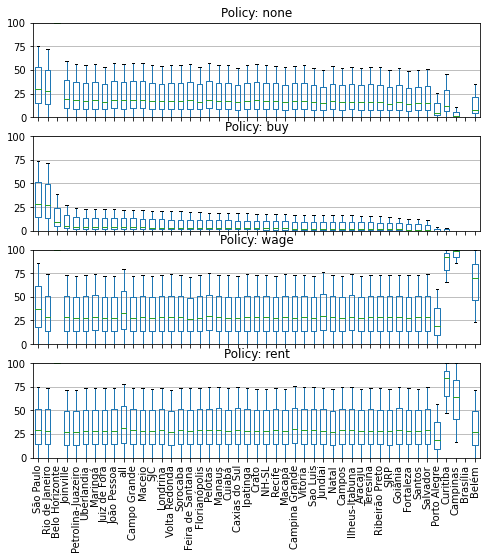

In [39]:
### in matplotlib

_dict['Policy: buy'].sort_values(ascending=False, by='value', inplace=True)

fig, axes = plt.subplots(nrows=4, ncols=1, squeeze=True, figsize=(8, 8))

plt.subplot(4, 1, 2).set_title('Policy: buy')
plt.ylim((0, 100))
_dict['Policy: buy'].set_index('MR').T.boxplot(widths = 0.6, column=list(_dict['Policy: buy']['MR'])).set(xticklabels=[])
plt.grid(visible=False, axis='x')

plt.subplot(4, 1, 1).set_title('Policy: none')
plt.ylim((0, 100))
_dict['Policy: none'].set_index('MR').T.boxplot(widths = 0.6, column=list(_dict['Policy: buy']['MR'])).set(xticklabels=[])
plt.grid(visible=False, axis='x')

plt.subplot(4, 1, 3).set_title('Policy: wage')
plt.ylim((0, 100))
_dict['Policy: wage'].set_index('MR').T.boxplot(widths = 0.6, column=list(_dict['Policy: buy']['MR'])).set(xticklabels=[])
plt.grid(visible=False, axis='x')

plt.subplot(4, 1, 4).set_title('Policy: rent')
plt.ylim((0, 100))
_dict['Policy: rent'].set_index('MR').T.boxplot(widths = 0.6, column=list(_dict['Policy: buy']['MR']))

plt.xticks(rotation=90)
plt.grid(visible=False, axis='x')


plt.savefig(f'../text/figures/boxplot.png', bbox_inches='tight', transparent=True)
plt.show()